<br>
Данные разбиты на два листа - общая информация о точках клиента и данные о выручках клиента с 2015 по 2018 годы.

Клиент прислал эти данные чтобы вы, как аналитик, могли сформировать модель машинного обучения для прогнозирования выручек клиента по новым точкам.

Первый этап этой работы - проверка присланных клиентом данных.

Точки клиента разбиты на тестовую и обучающую выборки (указано на первом листе файла в столбце “Выборка”). По магазинам обучающей выборки клиент предоставляет свои выручки (второй лист) для обучения будущей модели. На тестовых точках клиент потом самостоятельно проверит качество прогнозирования, поэтому выручки по тестовым точкам он нам не предоставляет.


В качестве результата тестового задания мы ждем от вас письмо клиенту с замечаниями, вопросами, уточнениями по данным. Представьте, что вам дальше необходимо будет загрузить эти данные в систему и использовать их для формирования модели спроса - тяжело это делать с некорректными или непонятными данными.


Формирование модели машинного обучения находится за рамками тестового задания, ее делать не нужно.

Также в этом письме необходимо указать ответы на следующие три вопроса:

 - Сколько магазинов формата стрит в тестовой выборке?
 - Какова средняя выручка магазинов формата мини ТЦ за 2016 год?
 - Сколько магазинов с бесплатной парковкой?

<br>

In [793]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [794]:
data_business = pd.read_excel('data/Внимание.xlsx', sheet_name='Справочник точек')
data_revenue = pd.read_excel('data/Внимание.xlsx', sheet_name='Выручка по обучающей выборке')

In [795]:
print(f'Objects: {data_business.shape[0]}')
print(f'Features: {data_business.shape[1]}')
data_business.head()

Objects: 246
Features: 21


,id точки,Адрес,Широта,Долгота,Дата открытия,Дата закрытия,Площадь магазина,Тип входа,Площадь ТЦ,Формат магазина,...,Этаж,Время работы,Заполненность ТЦ,Рядом с эскалатором,Рядом со входом,Конкуренты в ТЦ,Расположение в ТЦ,Толока,Люкс,Выборка
0,8955.0,"Оренбургская обл, Оренбург г, Шарлыкское ш, д...",55.118272,51.843127,2016-11-09 00:00:00,NaT,478,без сквозного прохода,130000.0,ТЦ,...,3,с 10:00 до 22:00,NaN,0,0,1.0,7.0,37.857582,69.500000,Обучающая
1,11007.0,"Алтайский край, г. Барнаул, ул. Малахова, дом ...",83.696799,53.356954,2010-04-26 00:00:00,NaT,332,сквозной проход,31500.0,ТЦ,...,1,с 10:00 до 22:00,NaN,0,1,NaN,9.0,57.810494,66.896552,Обучающая
2,11366.0,"Амурская область, Благовещенск, улица Мухина, 114",127.510357,50.280435,2017-08-25 00:00:00,NaT,356,без сквозного прохода,36000.0,ТЦ,...,1,с 10:00 до 22:00,3.0,0,1,1.0,6.0,49.959831,68.727273,Обучающая
3,11810.0,"Архангельская обл, г. Архангельск , Троицкий п...",40.528249,64.532316,2012-11-03 00:00:00,NaT,317,отдельный вход с улицы + сквозной проход,35000.0,ТЦ,...,1,с 10:00 до 21:00,3.0,0,1,0.0,10.0,128.459158,64.517241,Обучающая
4,15041.0,"Архангельская обл, г. Архангельск, Троицкий пр...",40.526317,64.534327,2006-12-09 00:00:00,NaT,176,сквозной проход,15332.0,ТЦ,...,цоколь,с 10:00 до 21:00,3.0,1,0,NaN,0.0,103.199885,78.275862,Тестовая


In [796]:
data_revenue = data_revenue.drop(154, axis=0) # 154 строка прочиталась по ошибке

print(f'Objects: {data_revenue.shape[0]}')
print(f'Features: {data_revenue.shape[1]}')
data_revenue.head()

Objects: 154
Features: 47


,id точки,2015-01-01,2015-02-01,2015-03-01,2015-04-01,2015-05-01,2015-06-01,2015-07-01,2015-08-01,2015-09-01,...,2018-01-01,2018-02-01,2018-04-01,2018-05-01,2018-06-01,2018-07-01,2018-08-01,2018-09-01,2018-10-01,2018-11-01
0,11366.0,245709.342667,301024.685000,406199.782258,295602.853000,268179.172258,266579.009667,202667.039355,207347.022581,237393.216667,...,271084.023513,298845.267500,277776.347333,270902.919677,280106.099000,243448.836129,236709.816452,248268.778333,296637.103226,314456.870000
1,11810.0,270245.842066,297964.820199,406198.175918,232433.263996,229317.708387,251403.308057,242000.555806,260407.109247,267051.162996,...,245402.383180,273515.012143,240088.292000,196260.466452,228920.589000,204058.825161,207104.013135,203499.409840,206013.017419,218636.436000
2,15041.0,171972.976000,198141.440000,260215.741935,205316.010644,187059.870968,198590.970667,178250.637781,187094.699355,211000.005517,...,174154.623627,173190.240000,240396.837333,241494.616774,264873.765333,227461.233548,249503.230968,251805.680000,263152.960000,269913.018667
3,15775.0,409032.989736,468816.460949,582717.510920,442807.529886,371689.316054,428430.990000,365894.971255,384266.496739,385515.509997,...,431909.251500,493571.089286,408575.490000,387081.406452,418398.840000,362395.248387,393423.329032,387866.910000,421387.374194,481330.143000
4,16102.0,437693.191667,510077.198214,602107.617742,465779.798333,423448.914516,414476.575000,370944.770968,392089.754839,416797.330000,...,378429.858867,453511.489286,388849.670000,369223.219355,392389.013333,328593.246774,350885.291935,369367.358333,427575.006452,472508.001667


<br>
<font size=4>1) Признаки набора "Справочник точек"</font>
<hr>

In [797]:
for col in data_business.columns:
    print(col)

id точки
Адрес
Широта
Долгота
Дата открытия
Дата закрытия
Площадь магазина
Тип входа
Площадь ТЦ
Формат магазина
Парковка
Этаж
Время работы
Заполненность ТЦ
Рядом с эскалатором
Рядом со входом
Конкуренты в ТЦ
Расположение в ТЦ
Толока
Люкс
Выборка


<br>

<i>Замечания клиенту:</i>
 - Мы удаляем признаки Широта и Долгота.
<br><br>

<i>Вопросы клиенту:</i>
 - Уточнить насчет "Заполненность ТЦ": 3 - макс / 0 - мин?
 - Уточнить насчет "Расположение в ТЦ" - что означают цифры?
 - Узнать смысл признака "Толока" и как рассчитывался.
 - Узнать смысл признака "Люкс" и как рассчитывался.
 <br>
 <br>

In [798]:
data_business = data_business.drop(['Широта', 'Долгота'], axis=1)
data_business.head()

,id точки,Адрес,Дата открытия,Дата закрытия,Площадь магазина,Тип входа,Площадь ТЦ,Формат магазина,Парковка,Этаж,Время работы,Заполненность ТЦ,Рядом с эскалатором,Рядом со входом,Конкуренты в ТЦ,Расположение в ТЦ,Толока,Люкс,Выборка
0,8955.0,"Оренбургская обл, Оренбург г, Шарлыкское ш, д...",2016-11-09 00:00:00,NaT,478,без сквозного прохода,130000.0,ТЦ,бесплатная парковка,3,с 10:00 до 22:00,NaN,0,0,1.0,7.0,37.857582,69.500000,Обучающая
1,11007.0,"Алтайский край, г. Барнаул, ул. Малахова, дом ...",2010-04-26 00:00:00,NaT,332,сквозной проход,31500.0,ТЦ,бесплатная парковка,1,с 10:00 до 22:00,NaN,0,1,NaN,9.0,57.810494,66.896552,Обучающая
2,11366.0,"Амурская область, Благовещенск, улица Мухина, 114",2017-08-25 00:00:00,NaT,356,без сквозного прохода,36000.0,ТЦ,бесплатная парковка,1,с 10:00 до 22:00,3.0,0,1,1.0,6.0,49.959831,68.727273,Обучающая
3,11810.0,"Архангельская обл, г. Архангельск , Троицкий п...",2012-11-03 00:00:00,NaT,317,отдельный вход с улицы + сквозной проход,35000.0,ТЦ,бесплатная парковка,1,с 10:00 до 21:00,3.0,0,1,0.0,10.0,128.459158,64.517241,Обучающая
4,15041.0,"Архангельская обл, г. Архангельск, Троицкий пр...",2006-12-09 00:00:00,NaT,176,сквозной проход,15332.0,ТЦ,бесплатная парковка,цоколь,с 10:00 до 21:00,3.0,1,0,NaN,0.0,103.199885,78.275862,Тестовая


<br>
<font size=4>2) Проверка признака <b>"id точки"</b></font>
<hr>

In [799]:
print(f'Кол-во уникальных id: {len(data_business["id точки"].unique())}', 
      f' кол-во объектов: {data_business.shape[0]}')

Кол-во уникальных id: 244  кол-во объектов: 246


In [800]:
from collections import Counter


def duplicate_check(column: str, col_type: str) -> None:
    """
    Фукнция для нахождения дубликатов
    :param column: название признака для проверки
    :сol_type: тип признака (float, object)
    :return: дубликаты
    """
    id_counter = Counter(data_business[column]) # считаем сколько раз встречается каждое значение

    for key, value in id_counter.items():
        if col_type == 'object':
            if value != 1 or key in ['', ' ', 'nan', 'Nan', '?']:
                print(f'{key}:{value}')
                
        if col_type == 'float':
            if value != 1 or np.isnan(key):
                print(f'{key}:{value}')

In [801]:
duplicate_check(column='id точки', col_type='float')

42645.0:2
42683.0:2
nan:1


<br>

 - Есть <b>два id</b>, которые в выборке встречаются <b>повторно</b>
 - Один id является nan, то есть отсутствует
 <br>
 <br>


In [802]:
data_business[data_business['id точки'].isnull()]

,id точки,Адрес,Дата открытия,Дата закрытия,Площадь магазина,Тип входа,Площадь ТЦ,Формат магазина,Парковка,Этаж,Время работы,Заполненность ТЦ,Рядом с эскалатором,Рядом со входом,Конкуренты в ТЦ,Расположение в ТЦ,Толока,Люкс,Выборка
229,NaN,"Тульская обл, г. Тула, ул. Советская, дом № 47...",2010-03-23 00:00:00,NaT,189,сквозной проход,51000.0,Мини ТЦ,платная парковка,1,с 10:00 до 22:00,2.0,0,0,1.0,2.0,49.039977,73.137931,Обучающая


<br>

У нас есть два варинта как поступить с пропущенным id:
 - Уточнить у клиента id точки по адресу: Тульская обл, г. Тула, ул. Советская, дом № 47...
 - Удалить его, так мы не сможем сопоставить его с выручкой.

<br>
Так как нам необходимо ответить на вопрос <b>"Какова средняя выручка магазинов формата мини ТЦ за 2016 год?"</b>, придется пока что удалить пропущенный id, потому что он как раз и является Мини ТЦ и не даст нам узнать выручку.
<br><br>

In [803]:
data_business = data_business.drop(229, axis=0)
data_business['id точки'].isnull().sum()

0

In [804]:
data_business['id точки'] = data_business['id точки'].astype('int64')
data_business['id точки']

0         8955
1        11007
2        11366
3        11810
4        15041
        ...   
241    2633929
242    2633930
243    2633935
244    2633946
245    2633948
Name: id точки, Length: 245, dtype: int64

<br>
Теперь проверим два повторяющихся id.
<br><br>

In [805]:
data_business[(data_business['id точки'] == 42645)]

,id точки,Адрес,Дата открытия,Дата закрытия,Площадь магазина,Тип входа,Площадь ТЦ,Формат магазина,Парковка,Этаж,Время работы,Заполненность ТЦ,Рядом с эскалатором,Рядом со входом,Конкуренты в ТЦ,Расположение в ТЦ,Толока,Люкс,Выборка
186,42645,"Респ. Татарстан, г. Нижнекамск, ул. Химиков, д...",2006-04-16 00:00:00,NaT,255,без сквозного прохода,2887.0,Мини ТЦ,бесплатная парковка,1,с 9:00 до 21:00,3.0,1,1,NaN,10.0,29.981741,54.62069,Обучающая
238,42645,"Респ. Татарстан, г. Нижнекамск, ул. Химиков, д...",2006-04-16 00:00:00,NaT,255,без сквозного прохода,2887.0,Мини ТЦ,бесплатная парковка,1,с 9:00 до 21:00,3.0,1,1,NaN,10.0,29.981741,54.62069,Обучающая


<br>
Удалим повторяющийся элемент.
<br><br>

In [806]:
data_business = data_business.drop(238, axis=0)
data_business[data_business['id точки'] == 42645.0]

,id точки,Адрес,Дата открытия,Дата закрытия,Площадь магазина,Тип входа,Площадь ТЦ,Формат магазина,Парковка,Этаж,Время работы,Заполненность ТЦ,Рядом с эскалатором,Рядом со входом,Конкуренты в ТЦ,Расположение в ТЦ,Толока,Люкс,Выборка
186,42645,"Респ. Татарстан, г. Нижнекамск, ул. Химиков, д...",2006-04-16 00:00:00,NaT,255,без сквозного прохода,2887.0,Мини ТЦ,бесплатная парковка,1,с 9:00 до 21:00,3.0,1,1,NaN,10.0,29.981741,54.62069,Обучающая


In [807]:
data_business[data_business['id точки'] == 42683.0]

,id точки,Адрес,Дата открытия,Дата закрытия,Площадь магазина,Тип входа,Площадь ТЦ,Формат магазина,Парковка,Этаж,Время работы,Заполненность ТЦ,Рядом с эскалатором,Рядом со входом,Конкуренты в ТЦ,Расположение в ТЦ,Толока,Люкс,Выборка
194,42683,"Россия, Пензенская область, Пенза, проспект Ст...",2013-12-27 00:00:00,NaT,578,без сквозного прохода,54500.0,ТЦ,бесплатная парковка,1,с 10:00 до 22:00,3.0,1,0,1.0,8.0,34.480876,60.500000,Обучающая
195,42683,"Россия, Пермский край, Пермь, улица Попова, 16",2012-07-15 00:00:00,NaT,277,без сквозного прохода,6400.0,Мини ТЦ,нет парковки,1,с 10:00 до 21:00,NaN,0,0,NaN,8.0,33.196617,63.896552,Обучающая


<br>
<i>Вопросы клиенту:</i>

 - В наборе присутствуют два разных магазина с одинаковым <b>id = 42683.0</b>. Из-за этого нет возможности сопоставить их с доходом. Если есть возможность уточните их id или доход.
 <br>
 <br>

<i>Для себя:</i>
 - Так как одна из точек имеет формат "Мини ТЦ", а нам необходимо рассчитать средний доход по "Мини ТЦ", тогда придется удалить точку 195
 
 <br>


In [808]:
data_revenue[data_revenue['id точки'] == 42683].iloc[:, 13:25] # проверка на доход в 2016 году

,2016-01-01,2016-02-01,2016-03-01,2016-04-01,2016-05-01,2016-06-01,2016-07-01,2016-08-01,2016-09-01,2016-10-01,2016-11-01,2016-12-01
121,112845.751333,122103.392759,169540.163871,94366.555667,100353.6,106509.617333,106632.150968,108016.763226,103707.372333,121351.532581,112168.614003,293144.517742


In [809]:
data_business = data_business.drop(195, axis=0)
data_business[data_business['id точки'] == 42683]

,id точки,Адрес,Дата открытия,Дата закрытия,Площадь магазина,Тип входа,Площадь ТЦ,Формат магазина,Парковка,Этаж,Время работы,Заполненность ТЦ,Рядом с эскалатором,Рядом со входом,Конкуренты в ТЦ,Расположение в ТЦ,Толока,Люкс,Выборка
194,42683,"Россия, Пензенская область, Пенза, проспект Ст...",2013-12-27 00:00:00,NaT,578,без сквозного прохода,54500.0,ТЦ,бесплатная парковка,1,с 10:00 до 22:00,3.0,1,0,1.0,8.0,34.480876,60.5,Обучающая


<br>
Теперь повторяющихся элементов нет и у всех точек есть id <br>
<br>

<br>
<font size=4>3) Проверка признака "Адрес"</font>
<hr>

In [810]:
print(f'Кол-во уникальных id: {len(data_business["Адрес"].unique())}', 
      f' кол-во объектов: {data_business.shape[0]}')

Кол-во уникальных id: 242  кол-во объектов: 243


In [811]:
duplicate_check(column='Адрес', col_type='object')

г. Санкт-Петербург, пл. Александра Невского, дом № 2, МФК "Москва":2


Адрес повторяется, но, скорей всего, в МФК находятся две точки

<br>
<font size=4>4) Проверка признака "Дата открытия"</font>
<hr>

In [812]:
data_business[data_business['Дата открытия'].isnull()]

,id точки,Адрес,Дата открытия,Дата закрытия,Площадь магазина,Тип входа,Площадь ТЦ,Формат магазина,Парковка,Этаж,Время работы,Заполненность ТЦ,Рядом с эскалатором,Рядом со входом,Конкуренты в ТЦ,Расположение в ТЦ,Толока,Люкс,Выборка
106,42220,"Камчатский край, г. Петропавловск-Камчатский, ...",NaN,NaT,1488,сквозной проход,9000.0,ТЦ,бесплатная парковка,цоколь,с 10:00 до 21:00,NaN,0,0,NaN,8.0,37.415914,63.12,Обучающая


<br>
<i>Вопросы клиенту:</i>

 - id: <b>42220</b> адрес: <b>'Камчатский край, г. Петропавловск-Камчатский, пр. Победы, дом № 67, корпус 1, ТЦ "Шамса"'</b>. 
 Отсутствует <b>Дата открытия</b>
 <br>
 <br>

In [813]:
data_revenue[data_revenue['id точки'] == 42220]

,id точки,2015-01-01,2015-02-01,2015-03-01,2015-04-01,2015-05-01,2015-06-01,2015-07-01,2015-08-01,2015-09-01,...,2018-01-01,2018-02-01,2018-04-01,2018-05-01,2018-06-01,2018-07-01,2018-08-01,2018-09-01,2018-10-01,2018-11-01
62,42220.0,251442.38976,317900.068571,366595.468387,285741.696,251321.517419,302080.384,248677.532903,284744.789333,293942.016,...,183409.32224,226322.331429,216272.128,191377.507097,201106.304,178050.353548,205602.229677,184994.304,218083.79871,217239.68


<br>
<font size=4>5) Проверка признака "Площадь магазина"</font>
<hr>

In [814]:
data_business.head()

,id точки,Адрес,Дата открытия,Дата закрытия,Площадь магазина,Тип входа,Площадь ТЦ,Формат магазина,Парковка,Этаж,Время работы,Заполненность ТЦ,Рядом с эскалатором,Рядом со входом,Конкуренты в ТЦ,Расположение в ТЦ,Толока,Люкс,Выборка
0,8955,"Оренбургская обл, Оренбург г, Шарлыкское ш, д...",2016-11-09 00:00:00,NaT,478,без сквозного прохода,130000.0,ТЦ,бесплатная парковка,3,с 10:00 до 22:00,NaN,0,0,1.0,7.0,37.857582,69.500000,Обучающая
1,11007,"Алтайский край, г. Барнаул, ул. Малахова, дом ...",2010-04-26 00:00:00,NaT,332,сквозной проход,31500.0,ТЦ,бесплатная парковка,1,с 10:00 до 22:00,NaN,0,1,NaN,9.0,57.810494,66.896552,Обучающая
2,11366,"Амурская область, Благовещенск, улица Мухина, 114",2017-08-25 00:00:00,NaT,356,без сквозного прохода,36000.0,ТЦ,бесплатная парковка,1,с 10:00 до 22:00,3.0,0,1,1.0,6.0,49.959831,68.727273,Обучающая
3,11810,"Архангельская обл, г. Архангельск , Троицкий п...",2012-11-03 00:00:00,NaT,317,отдельный вход с улицы + сквозной проход,35000.0,ТЦ,бесплатная парковка,1,с 10:00 до 21:00,3.0,0,1,0.0,10.0,128.459158,64.517241,Обучающая
4,15041,"Архангельская обл, г. Архангельск, Троицкий пр...",2006-12-09 00:00:00,NaT,176,сквозной проход,15332.0,ТЦ,бесплатная парковка,цоколь,с 10:00 до 21:00,3.0,1,0,NaN,0.0,103.199885,78.275862,Тестовая


In [815]:
data_business['Площадь магазина'].describe()

count     243.000000
mean      382.572016
std       206.845767
min        91.000000
25%       252.000000
50%       332.000000
75%       433.500000
max      1488.000000
Name: Площадь магазина, dtype: float64

<br>
<font size=4>6) Проверка признака "Тип входа"</font>
<hr>

In [816]:
data_business.head()

,id точки,Адрес,Дата открытия,Дата закрытия,Площадь магазина,Тип входа,Площадь ТЦ,Формат магазина,Парковка,Этаж,Время работы,Заполненность ТЦ,Рядом с эскалатором,Рядом со входом,Конкуренты в ТЦ,Расположение в ТЦ,Толока,Люкс,Выборка
0,8955,"Оренбургская обл, Оренбург г, Шарлыкское ш, д...",2016-11-09 00:00:00,NaT,478,без сквозного прохода,130000.0,ТЦ,бесплатная парковка,3,с 10:00 до 22:00,NaN,0,0,1.0,7.0,37.857582,69.500000,Обучающая
1,11007,"Алтайский край, г. Барнаул, ул. Малахова, дом ...",2010-04-26 00:00:00,NaT,332,сквозной проход,31500.0,ТЦ,бесплатная парковка,1,с 10:00 до 22:00,NaN,0,1,NaN,9.0,57.810494,66.896552,Обучающая
2,11366,"Амурская область, Благовещенск, улица Мухина, 114",2017-08-25 00:00:00,NaT,356,без сквозного прохода,36000.0,ТЦ,бесплатная парковка,1,с 10:00 до 22:00,3.0,0,1,1.0,6.0,49.959831,68.727273,Обучающая
3,11810,"Архангельская обл, г. Архангельск , Троицкий п...",2012-11-03 00:00:00,NaT,317,отдельный вход с улицы + сквозной проход,35000.0,ТЦ,бесплатная парковка,1,с 10:00 до 21:00,3.0,0,1,0.0,10.0,128.459158,64.517241,Обучающая
4,15041,"Архангельская обл, г. Архангельск, Троицкий пр...",2006-12-09 00:00:00,NaT,176,сквозной проход,15332.0,ТЦ,бесплатная парковка,цоколь,с 10:00 до 21:00,3.0,1,0,NaN,0.0,103.199885,78.275862,Тестовая


In [817]:
data_business['Тип входа'].value_counts()

без сквозного прохода                       137
сквозной проход                              45
отдельный вход с улицы                       36
отдельный вход с улицы + сквозной проход     17
единственный вход в ТК                        6
Name: Тип входа, dtype: int64

In [818]:
data_business[data_business['Тип входа'].isnull()]

,id точки,Адрес,Дата открытия,Дата закрытия,Площадь магазина,Тип входа,Площадь ТЦ,Формат магазина,Парковка,Этаж,Время работы,Заполненность ТЦ,Рядом с эскалатором,Рядом со входом,Конкуренты в ТЦ,Расположение в ТЦ,Толока,Люкс,Выборка
148,42437,"Московская область, г. Серпухов. ул. Советская...",2017-05-23 00:00:00,NaT,341,NaN,21800.0,ТЦ,NaN,1,NaN,NaN,0,0,NaN,4.0,51.027292,62.758621,Тестовая
150,42443,"Московская область, Пушкино, ул Красноармейско...",2016-11-16 00:00:00,NaT,661,NaN,28000.0,ТЦ,NaN,1,NaN,NaN,0,1,NaN,2.0,21.857582,55.068966,Тестовая


<br>
<i>Для себя:</i>

 - id: <b>42437 и 42443</b> относятся к тестовой быборке, по условию задачи рассматривать мы их не будем</b>
 <br>
 <br>

<br>
<font size=4>7) Проверка признака "Площадь ТЦ"</font>
<hr>

In [819]:
data_business.head()

,id точки,Адрес,Дата открытия,Дата закрытия,Площадь магазина,Тип входа,Площадь ТЦ,Формат магазина,Парковка,Этаж,Время работы,Заполненность ТЦ,Рядом с эскалатором,Рядом со входом,Конкуренты в ТЦ,Расположение в ТЦ,Толока,Люкс,Выборка
0,8955,"Оренбургская обл, Оренбург г, Шарлыкское ш, д...",2016-11-09 00:00:00,NaT,478,без сквозного прохода,130000.0,ТЦ,бесплатная парковка,3,с 10:00 до 22:00,NaN,0,0,1.0,7.0,37.857582,69.500000,Обучающая
1,11007,"Алтайский край, г. Барнаул, ул. Малахова, дом ...",2010-04-26 00:00:00,NaT,332,сквозной проход,31500.0,ТЦ,бесплатная парковка,1,с 10:00 до 22:00,NaN,0,1,NaN,9.0,57.810494,66.896552,Обучающая
2,11366,"Амурская область, Благовещенск, улица Мухина, 114",2017-08-25 00:00:00,NaT,356,без сквозного прохода,36000.0,ТЦ,бесплатная парковка,1,с 10:00 до 22:00,3.0,0,1,1.0,6.0,49.959831,68.727273,Обучающая
3,11810,"Архангельская обл, г. Архангельск , Троицкий п...",2012-11-03 00:00:00,NaT,317,отдельный вход с улицы + сквозной проход,35000.0,ТЦ,бесплатная парковка,1,с 10:00 до 21:00,3.0,0,1,0.0,10.0,128.459158,64.517241,Обучающая
4,15041,"Архангельская обл, г. Архангельск, Троицкий пр...",2006-12-09 00:00:00,NaT,176,сквозной проход,15332.0,ТЦ,бесплатная парковка,цоколь,с 10:00 до 21:00,3.0,1,0,NaN,0.0,103.199885,78.275862,Тестовая


In [820]:
data_business['Площадь ТЦ'].describe()

count       201.000000
mean      70299.805970
std       67300.524458
min         700.000000
25%       20000.000000
50%       48000.000000
75%      103500.000000
max      396000.000000
Name: Площадь ТЦ, dtype: float64

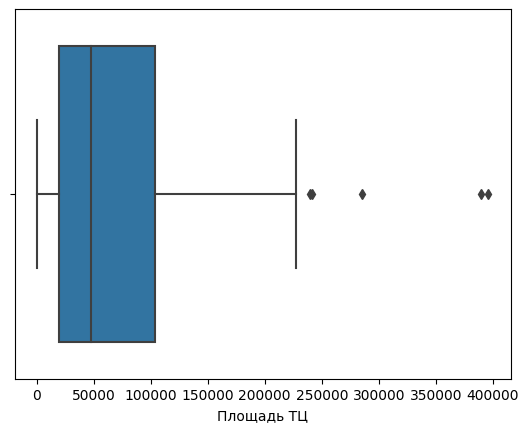

In [821]:
sns.boxplot(x=data_business['Площадь ТЦ'])
plt.show()

<br>
<i>Вопросы клиенту:</i>

 - Много пропусков в признаке <b>Площадь ТЦ</b>. Необходимо либо восстановить пропуски, либо удалить признак, так как с неполными данными он дает выбросы.
 <br>
 <br>

<br>
<font size=4>7) Проверка признака "Формат магазина"</font>
<hr>

In [822]:
data_business.head()

,id точки,Адрес,Дата открытия,Дата закрытия,Площадь магазина,Тип входа,Площадь ТЦ,Формат магазина,Парковка,Этаж,Время работы,Заполненность ТЦ,Рядом с эскалатором,Рядом со входом,Конкуренты в ТЦ,Расположение в ТЦ,Толока,Люкс,Выборка
0,8955,"Оренбургская обл, Оренбург г, Шарлыкское ш, д...",2016-11-09 00:00:00,NaT,478,без сквозного прохода,130000.0,ТЦ,бесплатная парковка,3,с 10:00 до 22:00,NaN,0,0,1.0,7.0,37.857582,69.500000,Обучающая
1,11007,"Алтайский край, г. Барнаул, ул. Малахова, дом ...",2010-04-26 00:00:00,NaT,332,сквозной проход,31500.0,ТЦ,бесплатная парковка,1,с 10:00 до 22:00,NaN,0,1,NaN,9.0,57.810494,66.896552,Обучающая
2,11366,"Амурская область, Благовещенск, улица Мухина, 114",2017-08-25 00:00:00,NaT,356,без сквозного прохода,36000.0,ТЦ,бесплатная парковка,1,с 10:00 до 22:00,3.0,0,1,1.0,6.0,49.959831,68.727273,Обучающая
3,11810,"Архангельская обл, г. Архангельск , Троицкий п...",2012-11-03 00:00:00,NaT,317,отдельный вход с улицы + сквозной проход,35000.0,ТЦ,бесплатная парковка,1,с 10:00 до 21:00,3.0,0,1,0.0,10.0,128.459158,64.517241,Обучающая
4,15041,"Архангельская обл, г. Архангельск, Троицкий пр...",2006-12-09 00:00:00,NaT,176,сквозной проход,15332.0,ТЦ,бесплатная парковка,цоколь,с 10:00 до 21:00,3.0,1,0,NaN,0.0,103.199885,78.275862,Тестовая


In [823]:
data_business['Формат магазина'].value_counts()

ТЦ         191
Мини ТЦ     25
Street      18
Стрит        4
Мини-ТЦ      3
Strееt       1
Стрт         1
Name: Формат магазина, dtype: int64

In [824]:
print(f'Нормальный Street без опечатки: {(data_business["Формат магазина"] == "Street").sum()}') 
print(f'Street c двумя русскими буквами "е": {(data_business["Формат магазина"] == "Strееt").sum()}') 

Нормальный Street без опечатки: 18
Street c двумя русскими буквами "е": 1


In [825]:
data_business['Формат магазина'] = data_business['Формат магазина'].map(lambda x: 'Street' if x in ['Strееt', 'Стрит', 'Стрт'] else x) 
data_business['Формат магазина'] = data_business['Формат магазина'].map(lambda x: 'Мини ТЦ' if x == 'Мини-ТЦ' else x)
data_business['Формат магазина'].value_counts()

ТЦ         191
Мини ТЦ     28
Street      24
Name: Формат магазина, dtype: int64

<br>
<i>Замечания клиенту:</i>

 - В признаке <b>Формат магазина</b>. Прописано четыре разных версий Street (Стрт - принимаем тоже как Street). 
 
<br>
 
<i>Для себя:</i>
 
  - Кол-во магазинов формата "Street": 24
  
 <br>


<br>
<font size=4>8) Проверка признака "Парковка"</font>
<hr>

In [826]:
data_business.head()

,id точки,Адрес,Дата открытия,Дата закрытия,Площадь магазина,Тип входа,Площадь ТЦ,Формат магазина,Парковка,Этаж,Время работы,Заполненность ТЦ,Рядом с эскалатором,Рядом со входом,Конкуренты в ТЦ,Расположение в ТЦ,Толока,Люкс,Выборка
0,8955,"Оренбургская обл, Оренбург г, Шарлыкское ш, д...",2016-11-09 00:00:00,NaT,478,без сквозного прохода,130000.0,ТЦ,бесплатная парковка,3,с 10:00 до 22:00,NaN,0,0,1.0,7.0,37.857582,69.500000,Обучающая
1,11007,"Алтайский край, г. Барнаул, ул. Малахова, дом ...",2010-04-26 00:00:00,NaT,332,сквозной проход,31500.0,ТЦ,бесплатная парковка,1,с 10:00 до 22:00,NaN,0,1,NaN,9.0,57.810494,66.896552,Обучающая
2,11366,"Амурская область, Благовещенск, улица Мухина, 114",2017-08-25 00:00:00,NaT,356,без сквозного прохода,36000.0,ТЦ,бесплатная парковка,1,с 10:00 до 22:00,3.0,0,1,1.0,6.0,49.959831,68.727273,Обучающая
3,11810,"Архангельская обл, г. Архангельск , Троицкий п...",2012-11-03 00:00:00,NaT,317,отдельный вход с улицы + сквозной проход,35000.0,ТЦ,бесплатная парковка,1,с 10:00 до 21:00,3.0,0,1,0.0,10.0,128.459158,64.517241,Обучающая
4,15041,"Архангельская обл, г. Архангельск, Троицкий пр...",2006-12-09 00:00:00,NaT,176,сквозной проход,15332.0,ТЦ,бесплатная парковка,цоколь,с 10:00 до 21:00,3.0,1,0,NaN,0.0,103.199885,78.275862,Тестовая


In [827]:
data_business['Парковка'].value_counts()

бесплатная парковка    155
нет парковки            33
платная парковка        30
100                      2
1000                     1
700                      1
бесплатная паpковка      1
Name: Парковка, dtype: int64

In [828]:
set(data_business['Парковка'].value_counts().index[0]) - set(data_business['Парковка'].value_counts().index[-1])

{'р'}

Опечатка в английской букве p

In [829]:
data_business['Парковка'] = data_business['Парковка'].map(lambda x: 'бесплатная парковка' if x == 'бесплатная паpковка' else x)
data_business['Парковка'].value_counts()

бесплатная парковка    156
нет парковки            33
платная парковка        30
100                      2
1000                     1
700                      1
Name: Парковка, dtype: int64

In [830]:
strange_value = list(data_business[data_business['Парковка'] == 100].index)
strange_value.extend(list(data_business[data_business['Парковка'] == 1000].index))
strange_value.extend(list(data_business[data_business['Парковка'] == 700].index))
data_business.loc[strange_value]

,id точки,Адрес,Дата открытия,Дата закрытия,Площадь магазина,Тип входа,Площадь ТЦ,Формат магазина,Парковка,Этаж,Время работы,Заполненность ТЦ,Рядом с эскалатором,Рядом со входом,Конкуренты в ТЦ,Расположение в ТЦ,Толока,Люкс,Выборка
7,15775,"Астраханская обл, г. Астрахань, ул. Боевая, до...",2014-02-05 00:00:00,NaT,521,без сквозного прохода,130000.0,ТЦ,100,1,с 10:00 до 22:00,NaN,0,1,1.0,8.0,38.935806,62.827586,Обучающая
180,42597,"Респ. Северная Осетия, г. Владикавказ, ул. Ген...",2015-12-15 00:00:00,NaT,361,без сквозного прохода,10000.0,ТЦ,100,2,с 9:00 до 21:00,2.0,0,1,0.0,6.0,42.047857,73.965517,Обучающая
144,42420,"Московская обл, Одинцовский р-н, Немчиновка с,...",2018-08-18 00:00:00,NaT,900,без сквозного прохода,NaN,ТЦ,1000,1,NaN,2.0,1,0,NaN,12.0,248.234096,89.586207,Обучающая
187,42663,"Респ. Татарстан, Нижнекамский р-он, г. Нижнека...",2014-01-13 00:00:00,NaT,288,без сквозного прохода,19000.0,ТЦ,700,1,c 9:00 до 21:00,3.0,0,1,NaN,11.0,25.815107,58.068966,Обучающая


In [831]:
data_business['Парковка'].isnull().sum()

20

<br>
<i>Вопросы клиенту:</i>

 - В признаке <b>Парковка</b> у id: 
  - <b> 15775, 42597</b> значения <b>100</b> 
  - <b>42597</b> значение <b>1000</b> 
  - <b>42663</b> значение <b>700</b>
  
 - У 20 магазинов нет информации о Парковки
 
<br>
 
<i>Для себя:</i>
 
  - Кол-во магазинов c бесплатной парковкой: 156
  
 <br>

<br>
<font size=4>9) Проверка признака "Этаж"</font>
<hr>

In [832]:
data_business.head()

,id точки,Адрес,Дата открытия,Дата закрытия,Площадь магазина,Тип входа,Площадь ТЦ,Формат магазина,Парковка,Этаж,Время работы,Заполненность ТЦ,Рядом с эскалатором,Рядом со входом,Конкуренты в ТЦ,Расположение в ТЦ,Толока,Люкс,Выборка
0,8955,"Оренбургская обл, Оренбург г, Шарлыкское ш, д...",2016-11-09 00:00:00,NaT,478,без сквозного прохода,130000.0,ТЦ,бесплатная парковка,3,с 10:00 до 22:00,NaN,0,0,1.0,7.0,37.857582,69.500000,Обучающая
1,11007,"Алтайский край, г. Барнаул, ул. Малахова, дом ...",2010-04-26 00:00:00,NaT,332,сквозной проход,31500.0,ТЦ,бесплатная парковка,1,с 10:00 до 22:00,NaN,0,1,NaN,9.0,57.810494,66.896552,Обучающая
2,11366,"Амурская область, Благовещенск, улица Мухина, 114",2017-08-25 00:00:00,NaT,356,без сквозного прохода,36000.0,ТЦ,бесплатная парковка,1,с 10:00 до 22:00,3.0,0,1,1.0,6.0,49.959831,68.727273,Обучающая
3,11810,"Архангельская обл, г. Архангельск , Троицкий п...",2012-11-03 00:00:00,NaT,317,отдельный вход с улицы + сквозной проход,35000.0,ТЦ,бесплатная парковка,1,с 10:00 до 21:00,3.0,0,1,0.0,10.0,128.459158,64.517241,Обучающая
4,15041,"Архангельская обл, г. Архангельск, Троицкий пр...",2006-12-09 00:00:00,NaT,176,сквозной проход,15332.0,ТЦ,бесплатная парковка,цоколь,с 10:00 до 21:00,3.0,1,0,NaN,0.0,103.199885,78.275862,Тестовая


In [833]:
data_business['Этаж'].value_counts()

1                      213
3                       10
2                        7
цоколь                   5
4.5                      1
20                       1
2019-05-02 00:00:00      1
Name: Этаж, dtype: int64

In [834]:
data_business[data_business['Этаж'] == pd.to_datetime('2019-05-02')]
data_business.loc[234, 'Дата закрытия'] = pd.to_datetime('2019-05-02')
data_business.loc[234, 'Этаж'] = np.nan
data_business.loc[234]

id точки                                                           42831
Адрес                  Хабаровский край, г. Хабаровск, ул. Ким-Ю-Чена...
Дата открытия                                        2009-12-04 00:00:00
Дата закрытия                                        2019-05-02 00:00:00
Площадь магазина                                                     288
Тип входа                                                сквозной проход
Площадь ТЦ                                                       18000.0
Формат магазина                                                       ТЦ
Парковка                                             бесплатная парковка
Этаж                                                                 NaN
Время работы                                            с 10:00 до 22:00
Заполненность ТЦ                                                     3.0
Рядом с эскалатором                                                    0
Рядом со входом                                    

In [835]:
data_business['Этаж'].value_counts()

1         213
3          10
2           7
цоколь      5
4.5         1
20          1
Name: Этаж, dtype: int64

In [836]:
data_business[data_business['Этаж'] == 4.5]

,id точки,Адрес,Дата открытия,Дата закрытия,Площадь магазина,Тип входа,Площадь ТЦ,Формат магазина,Парковка,Этаж,Время работы,Заполненность ТЦ,Рядом с эскалатором,Рядом со входом,Конкуренты в ТЦ,Расположение в ТЦ,Толока,Люкс,Выборка
212,42745,"Самарская обл, Самара г, Красноармейская ул, д...",2017-05-02 00:00:00,NaT,1058,без сквозного прохода,NaN,ТЦ,бесплатная парковка,4.5,NaN,2.0,1,1,NaN,13.0,56.23621,74.655172,Тестовая


In [837]:
data_business[data_business['Этаж'] == 20]

,id точки,Адрес,Дата открытия,Дата закрытия,Площадь магазина,Тип входа,Площадь ТЦ,Формат магазина,Парковка,Этаж,Время работы,Заполненность ТЦ,Рядом с эскалатором,Рядом со входом,Конкуренты в ТЦ,Расположение в ТЦ,Толока,Люкс,Выборка
232,42826,"Тюменская обл, г. Тюмень, ул. Орджоникидзе, до...",2016-02-08 00:00:00,NaT,424,сквозной проход,20720.0,ТЦ,бесплатная парковка,20,с 10:00 до 21:00,3.0,0,0,0.0,6.0,59.699404,104.310345,Обучающая


In [838]:
data_business['Этаж'].isnull().sum()

6

<br>
<i>Вопросы клиенту:</i>

 - В признаке <b>Этаж</b> у id: 
  - <b>42826</b> значение <b>20</b>
  - <b>42745</b> значение <b>4.5</b> 
 
 <br>
 
 - У 6 магазинов нет информации об этаже
 
<br>

<br>
<font size=4>10) Проверка признака "Время работы"</font>
<hr>

In [839]:
data_business.head()

,id точки,Адрес,Дата открытия,Дата закрытия,Площадь магазина,Тип входа,Площадь ТЦ,Формат магазина,Парковка,Этаж,Время работы,Заполненность ТЦ,Рядом с эскалатором,Рядом со входом,Конкуренты в ТЦ,Расположение в ТЦ,Толока,Люкс,Выборка
0,8955,"Оренбургская обл, Оренбург г, Шарлыкское ш, д...",2016-11-09 00:00:00,NaT,478,без сквозного прохода,130000.0,ТЦ,бесплатная парковка,3,с 10:00 до 22:00,NaN,0,0,1.0,7.0,37.857582,69.500000,Обучающая
1,11007,"Алтайский край, г. Барнаул, ул. Малахова, дом ...",2010-04-26 00:00:00,NaT,332,сквозной проход,31500.0,ТЦ,бесплатная парковка,1,с 10:00 до 22:00,NaN,0,1,NaN,9.0,57.810494,66.896552,Обучающая
2,11366,"Амурская область, Благовещенск, улица Мухина, 114",2017-08-25 00:00:00,NaT,356,без сквозного прохода,36000.0,ТЦ,бесплатная парковка,1,с 10:00 до 22:00,3.0,0,1,1.0,6.0,49.959831,68.727273,Обучающая
3,11810,"Архангельская обл, г. Архангельск , Троицкий п...",2012-11-03 00:00:00,NaT,317,отдельный вход с улицы + сквозной проход,35000.0,ТЦ,бесплатная парковка,1,с 10:00 до 21:00,3.0,0,1,0.0,10.0,128.459158,64.517241,Обучающая
4,15041,"Архангельская обл, г. Архангельск, Троицкий пр...",2006-12-09 00:00:00,NaT,176,сквозной проход,15332.0,ТЦ,бесплатная парковка,цоколь,с 10:00 до 21:00,3.0,1,0,NaN,0.0,103.199885,78.275862,Тестовая


In [840]:
data_business['Время работы'].value_counts()

с 10:00 до 22:00                                                            128
с 10:00 до 21:00                                                             62
с 9:00 до 21:00                                                               7
Вс-Чт с 10:00 до 22:00 Пт-Сб с 10:00 до 23:00                                 4
с 10:00 до 23:00                                                              3
Пн-Сб с 10:00 до 21:00  Вс с 11:00 до 21:00                                   3
c 9:00 до 21:00                                                               2
Вс-Чт c 10:00 до 23:00           Пт-Сб с 10:00 до 24:00                       2
с 11:00 до 21:00                                                              2
Вс-Чт c 10:00 до 21:00    Пт-Сб с 10:00 до 22:00                              1
Вс-Чт с 10:00 до 22:00    Пт-Сб с 10:00 до 23:00                              1
Вс-Чт с 10:00 до 21:00     Пт-Сб с  10:00 до 22:00                            1
Пн-Сб с 10:00 до 20:00 Вс с 10:00 до 19:

In [841]:

data_business['Время работы'] = data_business['Время работы'].map(lambda x: ' '.join(x.split()).replace('-', ':') if type(x) is str else x)
data_business['Время работы']

0      с 10:00 до 22:00
1      с 10:00 до 22:00
2      с 10:00 до 22:00
3      с 10:00 до 21:00
4      с 10:00 до 21:00
             ...       
241    с 10:00 до 22:00
242                 NaN
243    с 10:00 до 22:00
244    с 10:00 до 21:00
245    с 10:00 до 22:00
Name: Время работы, Length: 243, dtype: object

In [842]:
print(f'Опечатка в "c 9:00 до 21:00": {set(time_series.index[8]) - set(time_series.index[2])}')
print(f'Опечатка в "c 9:00 до 21:00": {set(time_series.index[1]) - set(time_series.index[-5])}')

Опечатка в "c 9:00 до 21:00": {'c'}
Опечатка в "c 9:00 до 21:00": {'с'}


In [843]:
data_business['Время работы'].map(lambda x: x.replace('c', 'с') if type(x) is str else x).value_counts() # с англ букву "C" на русскую букву "C"

с 10:00 до 22:00                                                 130
с 10:00 до 21:00                                                  63
с 9:00 до 21:00                                                    9
Вс:Чт с 10:00 до 22:00 Пт:Сб с 10:00 до 23:00                      6
Вс:Чт с 10:00 до 23:00 Пт:Сб с 10:00 до 24:00                      3
с 10:00 до 23:00                                                   3
Пн:Сб с 10:00 до 21:00 Вс с 11:00 до 21:00                         3
Вс:Чт с 10:00 до 21:00 Пт:Сб с 10:00 до 22:00                      3
с 11:00 до 21:00                                                   2
Пн:Сб с 10:00 до 20:00 Вс с 10:00 до 19:00                         2
с 10:00 до 20:00                                                   1
Пн:Сб с 10:00 до 21:00 Вс с 10:00 до 20:00                         1
Пн:Пт с 9:00 до 20:00 Сб с 10:00 до 19:00 Вс с 10:00 до 18:00      1
с 10:00 до 24:00                                                   1
с 9:00 до 23:00                   

In [844]:
data_business['Время работы'].isnull().sum()

14

<br>
<i>Для себя:</i>

 - Время работы магазина я бы дропнул, не думаю, что этот признак особо важен
<br><br>

<br>
<font size=4>11) Проверка признака "Заполненность ТЦ"</font>
<hr>

In [845]:
data_business.head()

,id точки,Адрес,Дата открытия,Дата закрытия,Площадь магазина,Тип входа,Площадь ТЦ,Формат магазина,Парковка,Этаж,Время работы,Заполненность ТЦ,Рядом с эскалатором,Рядом со входом,Конкуренты в ТЦ,Расположение в ТЦ,Толока,Люкс,Выборка
0,8955,"Оренбургская обл, Оренбург г, Шарлыкское ш, д...",2016-11-09 00:00:00,NaT,478,без сквозного прохода,130000.0,ТЦ,бесплатная парковка,3,с 10:00 до 22:00,NaN,0,0,1.0,7.0,37.857582,69.500000,Обучающая
1,11007,"Алтайский край, г. Барнаул, ул. Малахова, дом ...",2010-04-26 00:00:00,NaT,332,сквозной проход,31500.0,ТЦ,бесплатная парковка,1,с 10:00 до 22:00,NaN,0,1,NaN,9.0,57.810494,66.896552,Обучающая
2,11366,"Амурская область, Благовещенск, улица Мухина, 114",2017-08-25 00:00:00,NaT,356,без сквозного прохода,36000.0,ТЦ,бесплатная парковка,1,с 10:00 до 22:00,3.0,0,1,1.0,6.0,49.959831,68.727273,Обучающая
3,11810,"Архангельская обл, г. Архангельск , Троицкий п...",2012-11-03 00:00:00,NaT,317,отдельный вход с улицы + сквозной проход,35000.0,ТЦ,бесплатная парковка,1,с 10:00 до 21:00,3.0,0,1,0.0,10.0,128.459158,64.517241,Обучающая
4,15041,"Архангельская обл, г. Архангельск, Троицкий пр...",2006-12-09 00:00:00,NaT,176,сквозной проход,15332.0,ТЦ,бесплатная парковка,цоколь,с 10:00 до 21:00,3.0,1,0,NaN,0.0,103.199885,78.275862,Тестовая


In [846]:
data_business['Заполненность ТЦ'].value_counts()

3.0    120
2.0     34
1.0     17
0.0      9
Name: Заполненность ТЦ, dtype: int64

In [847]:
data_business['Заполненность ТЦ'].isnull().sum()

63

<br>
<i>Вопросы клиенту:</i>

 - В признаке <b>Заполненность ТЦ</b> 63 пропуска. Нужно либо восстановить их, либо удалять признак.
 <br><br>

<br>
<font size=4>12) Проверка признака "Рядом с эскалатором"</font>
<hr>

In [848]:
data_business.head()

,id точки,Адрес,Дата открытия,Дата закрытия,Площадь магазина,Тип входа,Площадь ТЦ,Формат магазина,Парковка,Этаж,Время работы,Заполненность ТЦ,Рядом с эскалатором,Рядом со входом,Конкуренты в ТЦ,Расположение в ТЦ,Толока,Люкс,Выборка
0,8955,"Оренбургская обл, Оренбург г, Шарлыкское ш, д...",2016-11-09 00:00:00,NaT,478,без сквозного прохода,130000.0,ТЦ,бесплатная парковка,3,с 10:00 до 22:00,NaN,0,0,1.0,7.0,37.857582,69.500000,Обучающая
1,11007,"Алтайский край, г. Барнаул, ул. Малахова, дом ...",2010-04-26 00:00:00,NaT,332,сквозной проход,31500.0,ТЦ,бесплатная парковка,1,с 10:00 до 22:00,NaN,0,1,NaN,9.0,57.810494,66.896552,Обучающая
2,11366,"Амурская область, Благовещенск, улица Мухина, 114",2017-08-25 00:00:00,NaT,356,без сквозного прохода,36000.0,ТЦ,бесплатная парковка,1,с 10:00 до 22:00,3.0,0,1,1.0,6.0,49.959831,68.727273,Обучающая
3,11810,"Архангельская обл, г. Архангельск , Троицкий п...",2012-11-03 00:00:00,NaT,317,отдельный вход с улицы + сквозной проход,35000.0,ТЦ,бесплатная парковка,1,с 10:00 до 21:00,3.0,0,1,0.0,10.0,128.459158,64.517241,Обучающая
4,15041,"Архангельская обл, г. Архангельск, Троицкий пр...",2006-12-09 00:00:00,NaT,176,сквозной проход,15332.0,ТЦ,бесплатная парковка,цоколь,с 10:00 до 21:00,3.0,1,0,NaN,0.0,103.199885,78.275862,Тестовая


In [849]:
data_business['Рядом с эскалатором'].value_counts()

0    134
1    108
2      1
Name: Рядом с эскалатором, dtype: int64

In [850]:
data_business[data_business['Рядом с эскалатором'] == 2]

,id точки,Адрес,Дата открытия,Дата закрытия,Площадь магазина,Тип входа,Площадь ТЦ,Формат магазина,Парковка,Этаж,Время работы,Заполненность ТЦ,Рядом с эскалатором,Рядом со входом,Конкуренты в ТЦ,Расположение в ТЦ,Толока,Люкс,Выборка
15,17987,"Волгоградская обл, Волгоград г, Университетски...",2016-10-31 00:00:00,NaT,993,без сквозного прохода,NaN,ТЦ,бесплатная парковка,1,NaN,2.0,2,2,NaN,13.0,70.835287,91.862069,Обучающая


In [851]:
data_business['Рядом с эскалатором'].isnull().sum()

0

<br>
<i>Вопросы клиенту:</i>

 - В признаке <b>Рядом с эскалатором</b> у id <b>17987</b> значение 2. Что оно значит, если 1-да, 0-нет?
 <br><br>

<br>
<font size=4>13) Проверка признака "Рядом со входом"</font>
<hr>

In [852]:
data_business.head()

,id точки,Адрес,Дата открытия,Дата закрытия,Площадь магазина,Тип входа,Площадь ТЦ,Формат магазина,Парковка,Этаж,Время работы,Заполненность ТЦ,Рядом с эскалатором,Рядом со входом,Конкуренты в ТЦ,Расположение в ТЦ,Толока,Люкс,Выборка
0,8955,"Оренбургская обл, Оренбург г, Шарлыкское ш, д...",2016-11-09 00:00:00,NaT,478,без сквозного прохода,130000.0,ТЦ,бесплатная парковка,3,с 10:00 до 22:00,NaN,0,0,1.0,7.0,37.857582,69.500000,Обучающая
1,11007,"Алтайский край, г. Барнаул, ул. Малахова, дом ...",2010-04-26 00:00:00,NaT,332,сквозной проход,31500.0,ТЦ,бесплатная парковка,1,с 10:00 до 22:00,NaN,0,1,NaN,9.0,57.810494,66.896552,Обучающая
2,11366,"Амурская область, Благовещенск, улица Мухина, 114",2017-08-25 00:00:00,NaT,356,без сквозного прохода,36000.0,ТЦ,бесплатная парковка,1,с 10:00 до 22:00,3.0,0,1,1.0,6.0,49.959831,68.727273,Обучающая
3,11810,"Архангельская обл, г. Архангельск , Троицкий п...",2012-11-03 00:00:00,NaT,317,отдельный вход с улицы + сквозной проход,35000.0,ТЦ,бесплатная парковка,1,с 10:00 до 21:00,3.0,0,1,0.0,10.0,128.459158,64.517241,Обучающая
4,15041,"Архангельская обл, г. Архангельск, Троицкий пр...",2006-12-09 00:00:00,NaT,176,сквозной проход,15332.0,ТЦ,бесплатная парковка,цоколь,с 10:00 до 21:00,3.0,1,0,NaN,0.0,103.199885,78.275862,Тестовая


In [853]:
data_business['Рядом со входом'].value_counts()

0    128
1    112
2      2
3      1
Name: Рядом со входом, dtype: int64

In [854]:
data_business[(data_business['Рядом со входом'] == 2) | (data_business['Рядом со входом'] == 3)]

,id точки,Адрес,Дата открытия,Дата закрытия,Площадь магазина,Тип входа,Площадь ТЦ,Формат магазина,Парковка,Этаж,Время работы,Заполненность ТЦ,Рядом с эскалатором,Рядом со входом,Конкуренты в ТЦ,Расположение в ТЦ,Толока,Люкс,Выборка
15,17987,"Волгоградская обл, Волгоград г, Университетски...",2016-10-31 00:00:00,NaT,993,без сквозного прохода,NaN,ТЦ,бесплатная парковка,1,NaN,2.0,2,2,NaN,13.0,70.835287,91.862069,Обучающая
114,42253,"Краснодарский край, г. Краснодар, ул. Уральска...",2011-10-05 00:00:00,NaT,249,сквозной проход,178000.0,ТЦ,бесплатная парковка,1,с 10:00 до 22:00,2.0,1,3,NaN,10.0,66.159523,71.000000,Тестовая
226,42800,"Тверская обл, Калининский р-он, г. Тверь, Твер...",2011-11-02 00:00:00,NaT,387,отдельный вход с улицы,NaN,Street,NaN,1,с 10:00 до 21:00,NaN,1,2,NaN,3.0,31.287526,66.000000,Обучающая


In [855]:
data_business['Рядом со входом'].isnull().sum()

0

<br>
<i>Вопросы клиенту:</i>

 - В признаке <b>Рядом со входом</b> у id:
  - <b>17987, 42800</b> значения 2. Что оно значит, если 1-да, 0-нет?
  - <b>42253</b> значение 3. Что оно значит?
 <br><br>

<br>
<font size=4>14) Проверка признака "Конкуренты в ТЦ"</font>
<hr>

In [856]:
data_business.head()

,id точки,Адрес,Дата открытия,Дата закрытия,Площадь магазина,Тип входа,Площадь ТЦ,Формат магазина,Парковка,Этаж,Время работы,Заполненность ТЦ,Рядом с эскалатором,Рядом со входом,Конкуренты в ТЦ,Расположение в ТЦ,Толока,Люкс,Выборка
0,8955,"Оренбургская обл, Оренбург г, Шарлыкское ш, д...",2016-11-09 00:00:00,NaT,478,без сквозного прохода,130000.0,ТЦ,бесплатная парковка,3,с 10:00 до 22:00,NaN,0,0,1.0,7.0,37.857582,69.500000,Обучающая
1,11007,"Алтайский край, г. Барнаул, ул. Малахова, дом ...",2010-04-26 00:00:00,NaT,332,сквозной проход,31500.0,ТЦ,бесплатная парковка,1,с 10:00 до 22:00,NaN,0,1,NaN,9.0,57.810494,66.896552,Обучающая
2,11366,"Амурская область, Благовещенск, улица Мухина, 114",2017-08-25 00:00:00,NaT,356,без сквозного прохода,36000.0,ТЦ,бесплатная парковка,1,с 10:00 до 22:00,3.0,0,1,1.0,6.0,49.959831,68.727273,Обучающая
3,11810,"Архангельская обл, г. Архангельск , Троицкий п...",2012-11-03 00:00:00,NaT,317,отдельный вход с улицы + сквозной проход,35000.0,ТЦ,бесплатная парковка,1,с 10:00 до 21:00,3.0,0,1,0.0,10.0,128.459158,64.517241,Обучающая
4,15041,"Архангельская обл, г. Архангельск, Троицкий пр...",2006-12-09 00:00:00,NaT,176,сквозной проход,15332.0,ТЦ,бесплатная парковка,цоколь,с 10:00 до 21:00,3.0,1,0,NaN,0.0,103.199885,78.275862,Тестовая


In [857]:
data_business['Конкуренты в ТЦ'].value_counts()

1.0    45
0.0    35
2.0    12
3.0     1
Name: Конкуренты в ТЦ, dtype: int64

In [858]:
data_business['Конкуренты в ТЦ'].isnull().sum()

150

<br>
<i>Замечания клиенту:</i>

 - В признаке <b>Конкуренты</b> 150 пропусков, стоит удалить его.
 <br><br>

<br>
<font size=4>15) Проверка признака "Расположение в ТЦ"</font>
<hr>

In [859]:
data_business.head()

,id точки,Адрес,Дата открытия,Дата закрытия,Площадь магазина,Тип входа,Площадь ТЦ,Формат магазина,Парковка,Этаж,Время работы,Заполненность ТЦ,Рядом с эскалатором,Рядом со входом,Конкуренты в ТЦ,Расположение в ТЦ,Толока,Люкс,Выборка
0,8955,"Оренбургская обл, Оренбург г, Шарлыкское ш, д...",2016-11-09 00:00:00,NaT,478,без сквозного прохода,130000.0,ТЦ,бесплатная парковка,3,с 10:00 до 22:00,NaN,0,0,1.0,7.0,37.857582,69.500000,Обучающая
1,11007,"Алтайский край, г. Барнаул, ул. Малахова, дом ...",2010-04-26 00:00:00,NaT,332,сквозной проход,31500.0,ТЦ,бесплатная парковка,1,с 10:00 до 22:00,NaN,0,1,NaN,9.0,57.810494,66.896552,Обучающая
2,11366,"Амурская область, Благовещенск, улица Мухина, 114",2017-08-25 00:00:00,NaT,356,без сквозного прохода,36000.0,ТЦ,бесплатная парковка,1,с 10:00 до 22:00,3.0,0,1,1.0,6.0,49.959831,68.727273,Обучающая
3,11810,"Архангельская обл, г. Архангельск , Троицкий п...",2012-11-03 00:00:00,NaT,317,отдельный вход с улицы + сквозной проход,35000.0,ТЦ,бесплатная парковка,1,с 10:00 до 21:00,3.0,0,1,0.0,10.0,128.459158,64.517241,Обучающая
4,15041,"Архангельская обл, г. Архангельск, Троицкий пр...",2006-12-09 00:00:00,NaT,176,сквозной проход,15332.0,ТЦ,бесплатная парковка,цоколь,с 10:00 до 21:00,3.0,1,0,NaN,0.0,103.199885,78.275862,Тестовая


In [860]:
data_business['Расположение в ТЦ'].value_counts()

10.0    37
9.0     33
8.0     29
7.0     22
11.0    16
6.0     15
5.0     15
4.0     14
12.0    11
3.0      7
13.0     6
14.0     5
2.0      4
1.0      3
1.5      1
10.5     1
0.0      1
7.5      1
Name: Расположение в ТЦ, dtype: int64

In [861]:
data_business['Расположение в ТЦ'].isnull().sum()

22

<br>
<font size=4>16) Проверка признака "Толока"</font>
<hr>

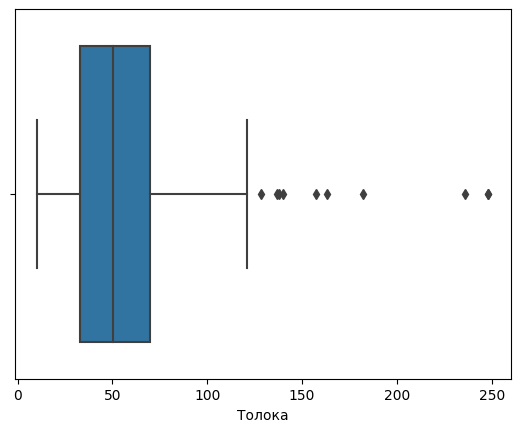

In [870]:
sns.boxplot(x=data_business['Толока'])
plt.show()

In [871]:
data_business['Толока'].describe()

count    243.000000
mean      56.941424
std       35.668846
min       10.454353
25%       32.977321
50%       50.345185
75%       69.958005
max      248.234096
Name: Толока, dtype: float64

In [872]:
data_business['Толока'].isnull().sum()

0

<br>
<font size=4>17) Проверка признака "Люкс"</font>
<hr>

In [873]:
data_business.head()

,id точки,Адрес,Дата открытия,Дата закрытия,Площадь магазина,Тип входа,Площадь ТЦ,Формат магазина,Парковка,Этаж,Время работы,Заполненность ТЦ,Рядом с эскалатором,Рядом со входом,Конкуренты в ТЦ,Расположение в ТЦ,Толока,Люкс,Выборка
0,8955,"Оренбургская обл, Оренбург г, Шарлыкское ш, д...",2016-11-09 00:00:00,NaT,478,без сквозного прохода,130000.0,ТЦ,бесплатная парковка,3,с 10:00 до 22:00,NaN,0,0,1.0,7.0,37.857582,69.500000,Обучающая
1,11007,"Алтайский край, г. Барнаул, ул. Малахова, дом ...",2010-04-26 00:00:00,NaT,332,сквозной проход,31500.0,ТЦ,бесплатная парковка,1,с 10:00 до 22:00,NaN,0,1,NaN,9.0,57.810494,66.896552,Обучающая
2,11366,"Амурская область, Благовещенск, улица Мухина, 114",2017-08-25 00:00:00,NaT,356,без сквозного прохода,36000.0,ТЦ,бесплатная парковка,1,с 10:00 до 22:00,3.0,0,1,1.0,6.0,49.959831,68.727273,Обучающая
3,11810,"Архангельская обл, г. Архангельск , Троицкий п...",2012-11-03 00:00:00,NaT,317,отдельный вход с улицы + сквозной проход,35000.0,ТЦ,бесплатная парковка,1,с 10:00 до 21:00,3.0,0,1,0.0,10.0,128.459158,64.517241,Обучающая
4,15041,"Архангельская обл, г. Архангельск, Троицкий пр...",2006-12-09 00:00:00,NaT,176,сквозной проход,15332.0,ТЦ,бесплатная парковка,цоколь,с 10:00 до 21:00,3.0,1,0,NaN,0.0,103.199885,78.275862,Тестовая


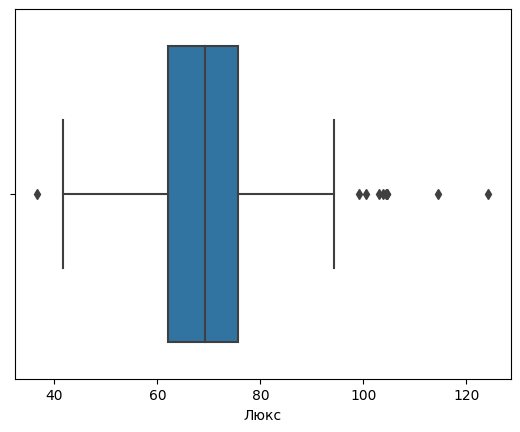

In [874]:
sns.boxplot(x=data_business['Люкс'])
plt.show()

In [875]:
data_business['Люкс'].describe()

count    243.000000
mean      69.716074
std       12.851603
min       36.724138
25%       61.982759
50%       69.333333
75%       75.741379
max      124.241379
Name: Люкс, dtype: float64

In [876]:
data_business['Люкс'].isnull().sum()

0

<br>
<font size=4>17) Проверка признака "Выборка"</font>
<hr>

In [877]:
data_business['Выборка'].value_counts()

Обучающая    153
Тестовая      77
-             10
Тест           1
Обyчающая      1
Name: Выборка, dtype: int64

In [878]:
print(f'Опечатка в Обучающая: {set(data_business["Выборка"].value_counts().index[0]) - set(data_business["Выборка"].value_counts().index[4])}')

Опечатка в Обучающая: {'у'}


In [879]:
data_business['Выборка'] = data_business['Выборка'].map(lambda x: x.replace('y', 'у') if type(x) is str else x)
data_business['Выборка'] = data_business['Выборка'].map(lambda x: np.nan if x == '-' else x)
data_business['Выборка'] = data_business['Выборка'].replace('Тест', 'Тестовая')
data_business['Выборка'].value_counts()

Обучающая    154
Тестовая      78
Name: Выборка, dtype: int64

In [880]:
data_business['Выборка'].isnull().sum()

11

<br>
<i>Замечания клиенту:</i>

 - В признаке <b>Выборка</b> 11 пропусков.
 <br><br>

<br>
<font size=4>Какова средняя выручка магазинов формата мини ТЦ за 2016 год?</font>
<hr>

In [895]:
data_learn = data_business[data_business['Выборка'] == 'Обучающая']
data_learn.head()

,id точки,Адрес,Дата открытия,Дата закрытия,Площадь магазина,Тип входа,Площадь ТЦ,Формат магазина,Парковка,Этаж,Время работы,Заполненность ТЦ,Рядом с эскалатором,Рядом со входом,Конкуренты в ТЦ,Расположение в ТЦ,Толока,Люкс,Выборка
0,8955,"Оренбургская обл, Оренбург г, Шарлыкское ш, д...",2016-11-09 00:00:00,NaT,478,без сквозного прохода,130000.0,ТЦ,бесплатная парковка,3,с 10:00 до 22:00,NaN,0,0,1.0,7.0,37.857582,69.500000,Обучающая
1,11007,"Алтайский край, г. Барнаул, ул. Малахова, дом ...",2010-04-26 00:00:00,NaT,332,сквозной проход,31500.0,ТЦ,бесплатная парковка,1,с 10:00 до 22:00,NaN,0,1,NaN,9.0,57.810494,66.896552,Обучающая
2,11366,"Амурская область, Благовещенск, улица Мухина, 114",2017-08-25 00:00:00,NaT,356,без сквозного прохода,36000.0,ТЦ,бесплатная парковка,1,с 10:00 до 22:00,3.0,0,1,1.0,6.0,49.959831,68.727273,Обучающая
3,11810,"Архангельская обл, г. Архангельск , Троицкий п...",2012-11-03 00:00:00,NaT,317,отдельный вход с улицы + сквозной проход,35000.0,ТЦ,бесплатная парковка,1,с 10:00 до 21:00,3.0,0,1,0.0,10.0,128.459158,64.517241,Обучающая
6,15621,"Архангельская обл, г. Северодвинск, ул. Ломоно...",2003-11-09 00:00:00,NaT,178,сквозной проход,20000.0,ТЦ,бесплатная парковка,1,с 10:00 до 21:00,3.0,0,0,0.0,8.0,82.880454,64.034483,Обучающая


In [882]:
id_minSHOP = data_learn[data_learn['Формат магазина'] == 'Мини ТЦ']['id точки']
id_minSHOP

18       18331
24       18728
30       41824
47       41933
66       42039
82       42113
94       42163
105      42219
112      42242
117      42276
118      42278
152      42458
163      42496
165      42504
181      42598
186      42645
204      42720
211      42743
242    2633930
Name: id точки, dtype: int64

In [883]:
data_revenue[data_revenue['id точки'].isnull()]

,id точки,2015-01-01,2015-02-01,2015-03-01,2015-04-01,2015-05-01,2015-06-01,2015-07-01,2015-08-01,2015-09-01,...,2018-01-01,2018-02-01,2018-04-01,2018-05-01,2018-06-01,2018-07-01,2018-08-01,2018-09-01,2018-10-01,2018-11-01
108,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
129,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,114585.758339,118510.4,94791.263333,93654.952258,108397.95,100705.532258,116268.127419,97226.428333,97570.266129,121038.385


In [884]:
data_revenue = data_revenue.drop([108, 129], axis=0)
data_revenue['id точки'].isnull().sum()

0

In [885]:
data_revenue['id точки'] = data_revenue['id точки'].astype('int64')
data_revenue.head()

,id точки,2015-01-01,2015-02-01,2015-03-01,2015-04-01,2015-05-01,2015-06-01,2015-07-01,2015-08-01,2015-09-01,...,2018-01-01,2018-02-01,2018-04-01,2018-05-01,2018-06-01,2018-07-01,2018-08-01,2018-09-01,2018-10-01,2018-11-01
0,11366,245709.342667,301024.685000,406199.782258,295602.853000,268179.172258,266579.009667,202667.039355,207347.022581,237393.216667,...,271084.023513,298845.267500,277776.347333,270902.919677,280106.099000,243448.836129,236709.816452,248268.778333,296637.103226,314456.870000
1,11810,270245.842066,297964.820199,406198.175918,232433.263996,229317.708387,251403.308057,242000.555806,260407.109247,267051.162996,...,245402.383180,273515.012143,240088.292000,196260.466452,228920.589000,204058.825161,207104.013135,203499.409840,206013.017419,218636.436000
2,15041,171972.976000,198141.440000,260215.741935,205316.010644,187059.870968,198590.970667,178250.637781,187094.699355,211000.005517,...,174154.623627,173190.240000,240396.837333,241494.616774,264873.765333,227461.233548,249503.230968,251805.680000,263152.960000,269913.018667
3,15775,409032.989736,468816.460949,582717.510920,442807.529886,371689.316054,428430.990000,365894.971255,384266.496739,385515.509997,...,431909.251500,493571.089286,408575.490000,387081.406452,418398.840000,362395.248387,393423.329032,387866.910000,421387.374194,481330.143000
4,16102,437693.191667,510077.198214,602107.617742,465779.798333,423448.914516,414476.575000,370944.770968,392089.754839,416797.330000,...,378429.858867,453511.489286,388849.670000,369223.219355,392389.013333,328593.246774,350885.291935,369367.358333,427575.006452,472508.001667


In [886]:
data_revenue = data_revenue.set_index('id точки')
data_revenue.head()

,2015-01-01,2015-02-01,2015-03-01,2015-04-01,2015-05-01,2015-06-01,2015-07-01,2015-08-01,2015-09-01,2015-10-01,...,2018-01-01,2018-02-01,2018-04-01,2018-05-01,2018-06-01,2018-07-01,2018-08-01,2018-09-01,2018-10-01,2018-11-01
id точки,,,,,,,,,,,,,,,,,,,,,
11366,245709.342667,301024.685000,406199.782258,295602.853000,268179.172258,266579.009667,202667.039355,207347.022581,237393.216667,241379.907097,...,271084.023513,298845.267500,277776.347333,270902.919677,280106.099000,243448.836129,236709.816452,248268.778333,296637.103226,314456.870000
11810,270245.842066,297964.820199,406198.175918,232433.263996,229317.708387,251403.308057,242000.555806,260407.109247,267051.162996,271966.447996,...,245402.383180,273515.012143,240088.292000,196260.466452,228920.589000,204058.825161,207104.013135,203499.409840,206013.017419,218636.436000
15041,171972.976000,198141.440000,260215.741935,205316.010644,187059.870968,198590.970667,178250.637781,187094.699355,211000.005517,209154.689032,...,174154.623627,173190.240000,240396.837333,241494.616774,264873.765333,227461.233548,249503.230968,251805.680000,263152.960000,269913.018667
15775,409032.989736,468816.460949,582717.510920,442807.529886,371689.316054,428430.990000,365894.971255,384266.496739,385515.509997,417088.393548,...,431909.251500,493571.089286,408575.490000,387081.406452,418398.840000,362395.248387,393423.329032,387866.910000,421387.374194,481330.143000
16102,437693.191667,510077.198214,602107.617742,465779.798333,423448.914516,414476.575000,370944.770968,392089.754839,416797.330000,458215.477419,...,378429.858867,453511.489286,388849.670000,369223.219355,392389.013333,328593.246774,350885.291935,369367.358333,427575.006452,472508.001667


In [901]:
id_minSHOP # id из файла "Справочник точек"

18       18331
24       18728
30       41824
47       41933
66       42039
82       42113
94       42163
105      42219
112      42242
117      42276
118      42278
152      42458
163      42496
165      42504
181      42598
186      42645
204      42720
211      42743
242    2633930
Name: id точки, dtype: int64

In [903]:
id_in_excel = []
for id_shop  in id_minSHOP:
    if id_shop in data_revenue.index:
        id_in_excel.append(id_shop)
print(id_in_excel)

[18728, 41824, 41933, 42219, 42242, 42458, 42496, 42504, 42720, 42743]


id мини ТЦ, которые нашлись в файле "Выручка по обучающей выборке"

In [905]:
data_miniSHOP = data_revenue.loc[id_in_excel]
data_miniSHOP

,2015-01-01,2015-02-01,2015-03-01,2015-04-01,2015-05-01,2015-06-01,2015-07-01,2015-08-01,2015-09-01,2015-10-01,...,2018-01-01,2018-02-01,2018-04-01,2018-05-01,2018-06-01,2018-07-01,2018-08-01,2018-09-01,2018-10-01,2018-11-01
id точки,,,,,,,,,,,,,,,,,,,,,
18728,337679.020000,505983.520415,615360.263226,500352.832000,425920.356129,430724.373333,375469.775484,393728.196129,424960.032000,440228.572903,...,373410.949707,4.685612e+05,399674.202667,407408.598710,4.000675e+05,347254.880000,394659.819355,365415.978293,4.342167e+05,4.673427e+05
41824,294160.860000,332418.278571,420586.925516,343592.490000,304774.200000,286569.600000,276055.519355,281996.941935,318999.450000,320237.593548,...,284639.819100,3.202741e+05,282319.110000,283913.593548,2.827235e+05,245294.738710,261821.583871,258710.340000,2.974931e+05,3.063746e+05
41933,109865.820000,126723.117857,152200.364516,107882.820000,91019.583871,99189.210000,95974.809677,97722.667742,99790.740000,110064.425806,...,137483.579100,1.421332e+05,108691.770000,109184.160000,1.139699e+05,106091.883871,119400.474194,100425.300000,1.135795e+05,1.204928e+05
42219,157466.511253,202047.920000,234949.409032,177244.293333,148637.114839,183352.651034,152184.046452,162511.241290,177276.026667,191130.818065,...,213195.209547,2.266750e+05,207612.421333,192076.206452,2.080060e+05,165456.480000,177566.064516,183363.712000,1.727240e+05,1.817432e+05
42242,264344.055172,348946.371429,415594.606452,266054.000000,245366.529032,276015.386667,231961.677419,260843.303226,261634.960000,302366.322581,...,217416.744552,2.592755e+05,220794.480000,189777.264516,2.118292e+05,183364.929032,192615.845161,213716.986667,2.147003e+05,2.728862e+05
42458,219149.590000,293537.514286,357135.970968,226599.376667,203653.077419,249762.076667,225139.590323,249907.119355,260166.170000,281639.777419,...,265228.260733,3.188488e+05,251739.180000,232292.854839,2.552087e+05,241624.509677,252351.461290,254306.250000,2.703375e+05,3.353723e+05
42496,239829.310345,303454.678571,393876.903226,227685.400000,218679.709677,272133.700000,253745.516129,278234.838710,284389.933333,272685.967742,...,301981.345172,3.315686e+05,250826.266667,245341.290323,2.616015e+05,265403.935484,289961.451613,264209.100000,2.882873e+05,3.329472e+05
42504,172584.289032,219756.954286,276604.092903,177366.738000,158834.874667,197529.253333,174931.129032,208360.836129,200176.081379,219909.610323,...,294858.957503,2.916936e+05,260022.929333,230384.925161,2.811142e+05,260060.354839,271794.951613,259467.160667,2.904111e+05,3.075868e+05
42720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,538240.075742,5.753074e+05,505546.560000,462613.393548,5.681034e+05,449464.412903,490554.587613,512510.480000,5.245763e+05,5.690977e+05


In [912]:
data_miniSHOP_2016 = data_miniSHOP.iloc[:, 12:24]
data_miniSHOP_2016

,2016-01-01,2016-02-01,2016-03-01,2016-04-01,2016-05-01,2016-06-01,2016-07-01,2016-08-01,2016-09-01,2016-10-01,2016-11-01,2016-12-01
id точки,,,,,,,,,,,,
18728,367034.64,518191.52,612575.473548,462814.8,477767.72129,451050.096000,401384.010323,383641.476129,422102.426667,422386.720000,405809.077707,856554.5744
41824,288251.64,380476.893103,409749.793548,335297.01,341503.345161,310039.590000,273176.738710,293777.854839,343191.180000,338595.300000,311294.64,588298.821097
41933,96125.46,131703.051724,166441.23871,103033.83,109410.63,107573.640000,98078.632258,115117.374194,104382.240000,132300.493548,102602.67,228666.224032
42219,165361.765333,183196.816166,234128.893793,181151.861333,166158.575484,173533.509333,162844.341333,169838.714839,173049.632000,200700.714667,179830.29904,296884.380439
42242,262235.282759,341500.413793,413340.774194,278217.413333,253406.967742,291884.933333,245933.264516,220819.148387,268867.520000,274188.619355,257091.973867,560730.918968
42458,247509.406897,341837.668966,403892.03871,268721.163333,263977.36129,274547.460000,272024.925806,258007.483871,274683.676667,312697.887097,289971.88,558147.665226
42496,288339.827586,373763.172414,424793.516129,247102.166667,268194.83871,288479.900000,269497.774194,282031.645161,268095.833333,283937.000000,281229.467333,537106.161613
42504,208697.489333,268136.578621,331250.030323,218518.301333,207277.721935,222148.099667,232665.450968,236915.669677,211914.458667,254999.308667,230982.218513,420625.293897
42720,NaN,NaN,NaN,NaN,NaN,NaN,475542.757882,255120.270964,227869.800000,304069.354839,292810.4796,471397.935097


Nan сделаем нулями, так как даже если там есть значения, то большой роли в среднем они не сыграют

In [921]:
data_miniSHOP_2016.loc[42720, :'2016-06-01'] = 0
data_miniSHOP_2016.loc[42743, :'2016-05-01'] = 0
data_miniSHOP_2016

,2016-01-01,2016-02-01,2016-03-01,2016-04-01,2016-05-01,2016-06-01,2016-07-01,2016-08-01,2016-09-01,2016-10-01,2016-11-01,2016-12-01
id точки,,,,,,,,,,,,
18728,367034.64,518191.52,612575.473548,462814.8,477767.72129,451050.096000,401384.010323,383641.476129,422102.426667,422386.720000,405809.077707,856554.5744
41824,288251.64,380476.893103,409749.793548,335297.01,341503.345161,310039.590000,273176.738710,293777.854839,343191.180000,338595.300000,311294.64,588298.821097
41933,96125.46,131703.051724,166441.23871,103033.83,109410.63,107573.640000,98078.632258,115117.374194,104382.240000,132300.493548,102602.67,228666.224032
42219,165361.765333,183196.816166,234128.893793,181151.861333,166158.575484,173533.509333,162844.341333,169838.714839,173049.632000,200700.714667,179830.29904,296884.380439
42242,262235.282759,341500.413793,413340.774194,278217.413333,253406.967742,291884.933333,245933.264516,220819.148387,268867.520000,274188.619355,257091.973867,560730.918968
42458,247509.406897,341837.668966,403892.03871,268721.163333,263977.36129,274547.460000,272024.925806,258007.483871,274683.676667,312697.887097,289971.88,558147.665226
42496,288339.827586,373763.172414,424793.516129,247102.166667,268194.83871,288479.900000,269497.774194,282031.645161,268095.833333,283937.000000,281229.467333,537106.161613
42504,208697.489333,268136.578621,331250.030323,218518.301333,207277.721935,222148.099667,232665.450968,236915.669677,211914.458667,254999.308667,230982.218513,420625.293897
42720,0,0,0,0,0,0.000000,475542.757882,255120.270964,227869.800000,304069.354839,292810.4796,471397.935097


In [924]:
salary_sum = 0
for id_shop in data_miniSHOP_2016.index:
    salary_sum += data_miniSHOP_2016.loc[id_shop].sum()
    
print(f'Средняя выручка мини ТЦ за 2016 год: {round(salary_sum/data_miniSHOP_2016.shape[0], 2)}')

Средняя выручка мини ТЦ за 2016 год: 3392767.26
